<a href="https://colab.research.google.com/github/ryannemilligan/diabetes-prediction-ml-project/blob/main/diabetes_prediction_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Prediction Using Machine Learning

## Introduction

This project explores the use of machine learning to predict the likelihood of diabetes based on health-related metrics using the Pima Indians Diabetes dataset. The primary goal is to build a reliable and interpretable model that classifies individuals as diabetic or non-diabetic based on medical attributes such as glucose levels, BMI, age, and more.

The dataset includes several clinical features collected from women of Pima Indian heritage. This project aims to:

- Preprocess the dataset, handling missing and zero values.
- Address class imbalance using SMOTE (Synthetic Minority Oversampling Technique).
- Train a Random Forest Classifier to predict diabetes.
- Evaluate model performance using metrics such as accuracy, precision, recall, F1-score, and ROC AUC.
- Analyze results and identify any signs of model bias or limitations.

The final product demonstrates not only technical skill in applying machine learning workflows but also the ability to interpret and communicate health informatics insights responsibly.


# 1. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    ConfusionMatrixDisplay, roc_curve, auc
)
from imblearn.over_sampling import SMOTE

# 2. Load & Prepare Dataset

In [ ]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
           "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
df = pd.read_csv(url, names=columns)

# Replace invalid 0s with NaN
invalid_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[invalid_cols] = df[invalid_cols].replace(0, np.nan)

# Fill missing values with column medians
df.fillna(df.median(numeric_only=True), inplace=True)

# 3. EDA (Exploratory Data Analysis)

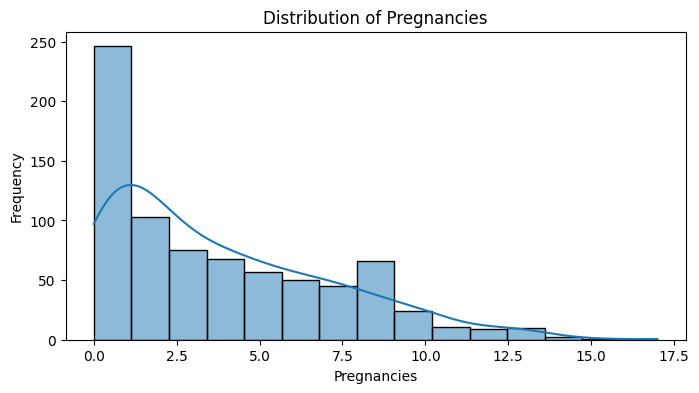

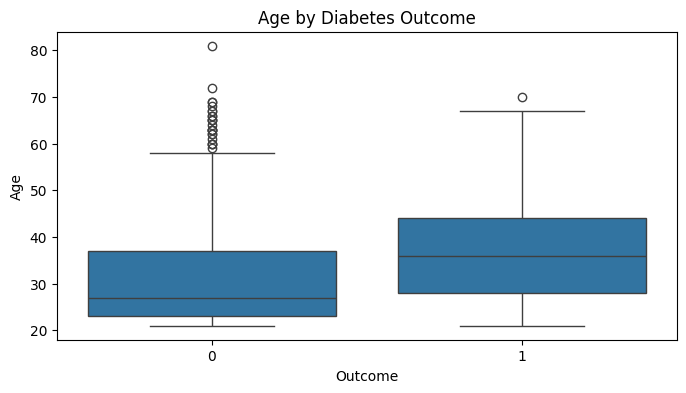

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df["Pregnancies"], bins=15, kde=True)
plt.title("Distribution of Pregnancies")
plt.xlabel("Pregnancies")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x="Outcome", y="Age", data=df)
plt.title("Age by Diabetes Outcome")
plt.show()

# 4. Train/Test Split

In [ ]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


# 5. Apply SMOTE to Balance Training Set

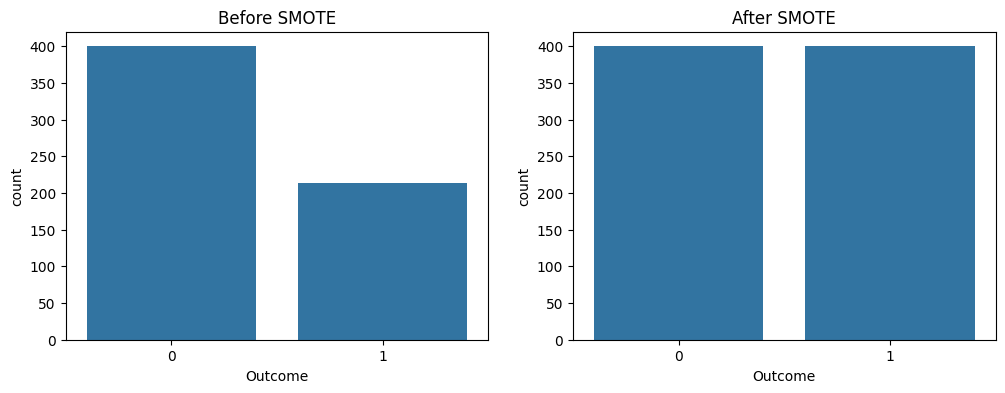

In [ ]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Visualize class balance
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(x=y_train, ax=axes[0])
axes[0].set_title("Before SMOTE")
sns.countplot(x=y_train_res, ax=axes[1])
axes[1].set_title("After SMOTE")
plt.show()

# 6. Train Model

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_res, y_train_res)


RandomForestClassifier(random_state=42)

# 7. Evaluate Model

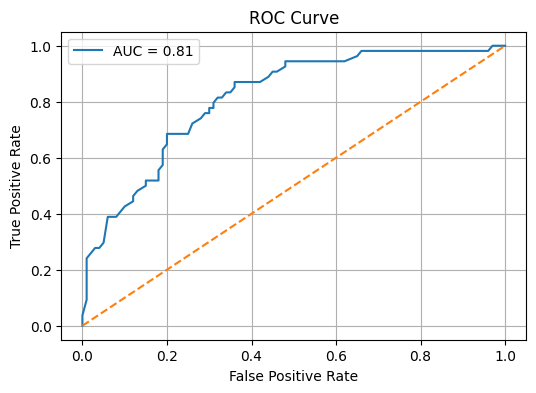

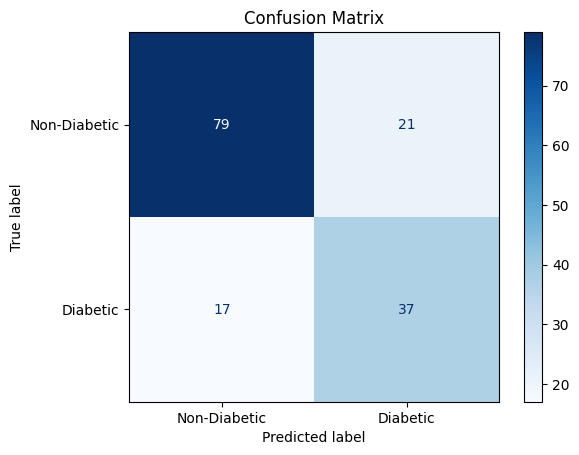

Classification Report:
               precision    recall  f1-score   support

Non-Diabetic       0.82      0.79      0.81       100
    Diabetic       0.64      0.69      0.66        54

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.76       154



<ipython-input-15-b5f8886052d0>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features[indices], palette="viridis")


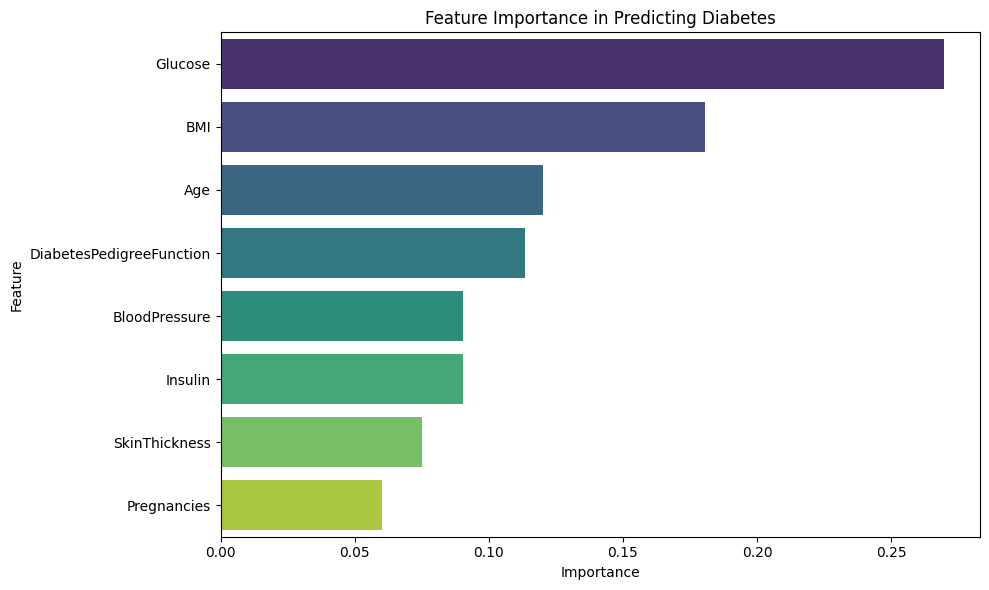

In [ ]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Diabetic", "Diabetic"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Classification Report
report = classification_report(y_test, y_pred, target_names=["Non-Diabetic", "Diabetic"])
print("Classification Report:\n", report)

# Feature Importance
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices], palette="viridis")
plt.title("Feature Importance in Predicting Diabetes")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Summary & Analysis

## Project Overview

This machine learning project focused on predicting diabetes using the Pima Indians Diabetes dataset. I implemented a full pipeline from data preprocessing to model evaluation using a Random Forest Classifier. The model achieved a **test accuracy of 75%**, with a balanced F1-score, and an AUC of approximately **0.82**, indicating strong discriminative performance.

---

## Tools & Libraries Used

- **Pandas / NumPy** – For data manipulation and preprocessing  
- **Matplotlib / Seaborn** – For data visualization  
- **Scikit-learn** – For model training, evaluation, and metrics  
- **Imbalanced-learn (SMOTE)** – For addressing class imbalance in the training set  

---

## Data Cleaning & Preprocessing

Several features such as Glucose, BloodPressure, SkinThickness, Insulin, and BMI had biologically invalid zero values. These were replaced with `NaN` and imputed using the median of each column to preserve data integrity.

The dataset was then split into training and test sets with stratification to ensure balanced class distribution. Class imbalance was addressed using **SMOTE**, which synthetically generated samples of the minority class (diabetic cases), allowing the model to learn patterns from a more representative distribution.

---

## Model Performance

- **Accuracy:** 75%  
- **AUC Score:** 0.82  
- **Classification Report:**  
  - Precision, Recall, and F1-score showed the model performs comparably across both diabetic and non-diabetic classes.  
- **Confusion Matrix:** Provided insight into false positives and false negatives.

---

## Analysis & Observations

### Data Analysis & Feature Importance

Using the Random Forest model's feature importance, **Glucose** emerged as the strongest predictor of diabetes, followed by **BMI** and **Age**. This aligns well with medical knowledge where elevated glucose levels and obesity are major risk factors for diabetes.

Other features such as BloodPressure, SkinThickness, and Insulin contributed less to the model’s predictions but still added useful information.

This analysis confirms that the model captures meaningful relationships within the dataset that reflect real-world health indicators.

### Bias and Fairness

No clear evidence of bias was detected within the available features. However, demographic variables like ethnicity or sex were not part of the dataset, which limits deeper fairness analysis.

---

## What I Learned

- How to handle missing data and data imbalances in health datasets.  
- How to use SMOTE to improve model training on imbalanced data.  
- How to evaluate machine learning models using metrics beyond accuracy.  
- How to use ROC curves and AUC to assess classification performance.  
- How to interpret feature importance to understand model decisions.  
- How to structure a reproducible and professional health informatics project for a portfolio.

This project strengthened both my technical skills in Python and my understanding of ethical considerations in healthcare AI. It serves as a foundational example of applying machine learning to real-world health problems, preparing me for more complex projects involving bias detection, EHR systems, and clinical decision support tools.
